In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [19]:
#data from https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
df = pd.read_csv(r"C:\Users\User\Downloads\postings.csv")

print("Dataset loaded successfully. Shape:", df.shape)


Dataset loaded successfully. Shape: (123849, 31)


In [20]:
#preview
print("First few rows:")
print(df.head(5))

#general info
print("\nDataset info:")
print(df.info())

#missing values
print("\nMissing values per column:")
print(df.isnull().sum())


First few rows:
     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                     NaN   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                     NaN   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HV

In [21]:
#duplicates
duplicate_count = df.duplicated(subset=["description"]).sum()
print("Number of duplicate descriptions:", duplicate_count)

duplicate_percentage = (duplicate_count / len(df)) * 100
print(f"Percentage of duplicate descriptions: {duplicate_percentage:.2f}%")


Number of duplicate descriptions: 16021
Percentage of duplicate descriptions: 12.94%


In [22]:
#very short job descriptions (<100 characters)
short_descriptions = df["description"].apply(lambda x: len(str(x)) < 100).sum()
print("Number of very short descriptions (<100 chars):", short_descriptions)

short_percentage = (short_descriptions / len(df)) * 100
print(f"Percentage of very short descriptions: {short_percentage:.2f}%")


Number of very short descriptions (<100 chars): 149
Percentage of very short descriptions: 0.12%


In [23]:
#checking for English
def is_mostly_english(text):
    text = str(text)  # Force into string
    english_chars = re.findall(r'[A-Za-z]', text)
    if len(english_chars) / max(len(text), 1) > 0.7:
        return True
    return False

english_jobs = df["description"].apply(is_mostly_english).sum()
english_percentage = (english_jobs / len(df)) * 100
print(f"Percentage of mostly English descriptions: {english_percentage:.2f}%")


Percentage of mostly English descriptions: 99.82%


In [24]:
#missing values in skills_desc
missing_skills = df["skills_desc"].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_skills / total_rows) * 100

print(f"Missing skills_desc entries: {missing_skills}")
print(f"Percentage of missing skills_desc: {missing_percentage:.2f}%")


Missing skills_desc entries: 121410
Percentage of missing skills_desc: 98.03%


In [29]:
# 1: drop columns
columns_to_drop = [
    "company_id", "views", "med_salary", "applies", "original_listed_time", "remote_allowed", "job_posting_url", "application_url", "application_type", 
    "expiry", "closed_time", "skills_desc", "listed_time", "posting_domain", "sponsored", "compensation_type", "zip_code", "fips","max_salary", 
    "min_salary", "pay_period", "currency", "normalized_salary", "work_type"]

df = df.drop(columns=columns_to_drop, errors='ignore')

# 2: remove duplicate descriptions
df = df.drop_duplicates(subset=["description"])

# 3: remove very short descriptions (<100 characters)
df = df[df["description"].apply(lambda x: len(str(x)) >= 100)]

# 4: remove descriptions that are not mostly English
def is_mostly_english(text):
    text = str(text)
    english_chars = re.findall(r'[A-Za-z]', text)
    if len(english_chars) / max(len(text), 1) > 0.7:
        return True
    return False

df = df[df["description"].apply(is_mostly_english)]

#reset index after cleaning
df = df.reset_index(drop=True)

#final dataset shape and columns
print("Final cleaned dataset shape:", df.shape)
print("Remaining columns:", df.columns.tolist())


Final cleaned dataset shape: (80502, 7)
Remaining columns: ['job_id', 'company_name', 'title', 'description', 'location', 'formatted_work_type', 'formatted_experience_level']


In [30]:
#quality check 

# 1: missing value percentage for each column
print("Missing values per column")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

# 2: unique values per column
print("\nUnique values per column")
unique_counts = df.nunique()
print(unique_counts)

# 3: quick overview
print("\n Overview")
overview = pd.DataFrame({
    "Missing %": missing_percent,
    "Unique values": unique_counts
}).sort_values(by="Missing %", ascending=False)

print(overview)


Missing values per column
job_id                        0.000000
company_name                  0.306825
title                         0.000000
description                   0.000000
location                      0.000000
formatted_work_type           0.000000
formatted_experience_level    0.000000
dtype: float64

Unique values per column
job_id                        80502
company_name                  15162
title                         54533
description                   80502
location                       7203
formatted_work_type               7
formatted_experience_level        6
dtype: int64

 Overview
                            Missing %  Unique values
company_name                 0.306825          15162
job_id                       0.000000          80502
title                        0.000000          54533
description                  0.000000          80502
location                     0.000000           7203
formatted_work_type          0.000000              7
formatted_exp

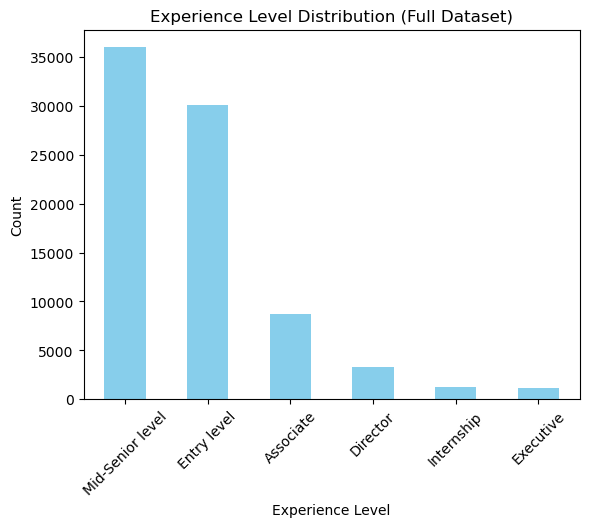

In [31]:
#experience level distribution
df["formatted_experience_level"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Experience Level Distribution (Full Dataset)")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [33]:
#removing nulls from exp level
df = df.dropna(subset=["formatted_experience_level"])
df = df.reset_index(drop=True)

In [34]:
#2nd EDA

#preview
print(df.head(5))

#basic info
print("\nDataset info:")
print(df.info())

#unique counts for key fields
print("\nUnique job titles:", df["title"].nunique())
print("Unique locations:", df["location"].nunique())
print("Unique formatted_work_types:", df["formatted_work_type"].nunique())
print("Unique formatted_experience_levels:", df["formatted_experience_level"].nunique())

#most common job titles
print("\nTop 10 job titles:")
print(df["title"].value_counts().head(10))

# locations
print("\nTop 10 locations:")
print(df["location"].value_counts().head(10))

# work types
print("\nWork type distribution:")
print(df["formatted_work_type"].value_counts())

# eexperience levels
print("\nExperience level distribution:")
print(df["formatted_experience_level"].value_counts())


       job_id             company_name  \
0  2147609789                 Revature   
1  2457183642  Galerie Candy and Gifts   
2  2558399667     I.T. Solutions, Inc.   
3  2989631782             ActOne Group   
4  3018278978             Aston Carter   

                                               title  \
0  Entry Level Oracle Financial Technology Consul...   
1                          Quality Assurance Manager   
2                  Validation Engineer, Labware LIMS   
3                  Administrative Assistant - CONCUR   
4                      Seasonal Office Administrator   

                                         description          location  \
0  About RevatureRevature is one of the largest a...  East Chicago, IN   
1  Galerie is seeking an experienced Quality Assu...        Hebron, KY   
2  Validation Engineer, Labware LIMSFoster City, ...   Foster City, CA   
3  Global Financial Services firm is seeking an e...      New York, NY   
4  Seasonal Office Admin\n\nResponsibili

In [44]:
#using train_test_split here only because it has stratified sampling

df_sampled, _ = train_test_split(
    df,
    train_size=10000,
    stratify=df["formatted_experience_level"],
    random_state=42
)

df_sampled = df_sampled.reset_index(drop=True)
print("Final dataset shape:", df_sampled.shape)

# save to CSV
save_path = "Job-postings-10k.csv"
df_sampled.to_csv(save_path, index=False, encoding="utf-8")
print("Saved to:", save_path)


Final dataset shape: (10000, 7)
Saved to: Job-postings-10k.csv


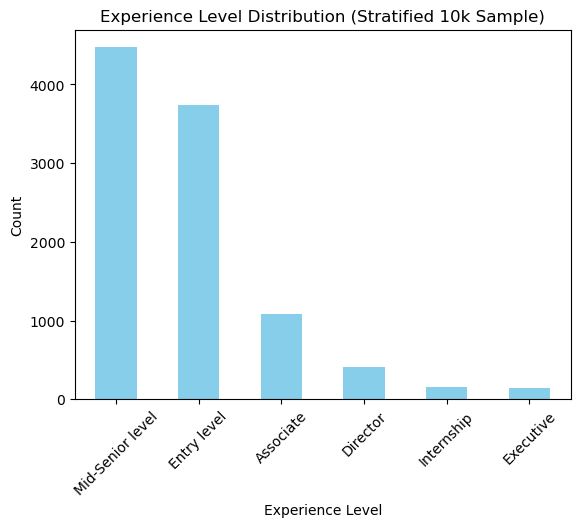

In [42]:
import matplotlib.pyplot as plt

# Plot experience level distribution for the 20k stratified sample
df_sampled["formatted_experience_level"].value_counts().plot(
    kind='bar', 
    color='skyblue'
)

plt.title("Experience Level Distribution (Stratified 10k Sample)")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [43]:
# Due to technical reasons had to export as a zip
import zipfile

with zipfile.ZipFile("job_postings_10k.zip", "w") as zipf:
    zipf.write("Job-postings-10k.csv")

print("Created zip archive: job_postings_10k.zip")


Created zip archive: job_postings_10k.zip
